## Odczytanie plików

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

folder_path = "results/"
y_Experts = [f'{folder_path}y_val_{i}.png' for i in range(5)]
y_Our = [f'{folder_path}y_pred_{i}.png' for i in range(5)]

## Wyświetlanie danych wejściowych


In [2]:
experts_images = []
our_images = []

for file in y_Experts:
    img = Image.open(file).convert('L')
    experts_images.append(np.array(img))

for file in y_Our:
    img = Image.open(file).convert('L')
    our_images.append(np.array(img))

exp_matrix = np.array(experts_images)
our_matrix = np.array(our_images)

print("Shape of exp_matrix:", exp_matrix.shape)
print("Shape of our_matrix:", our_matrix.shape)

Shape of exp_matrix: (5, 320, 448)
Shape of our_matrix: (5, 320, 448)


Wyniki ekspertskie:



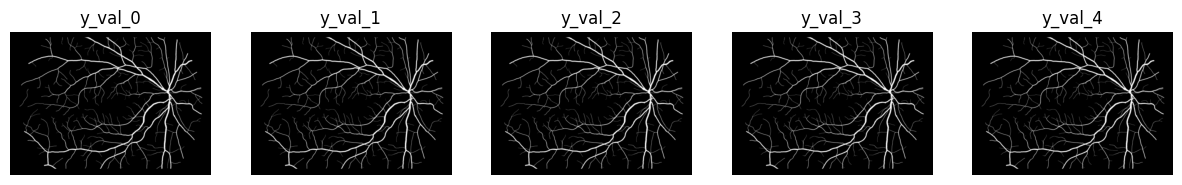

Wyniki nasze:



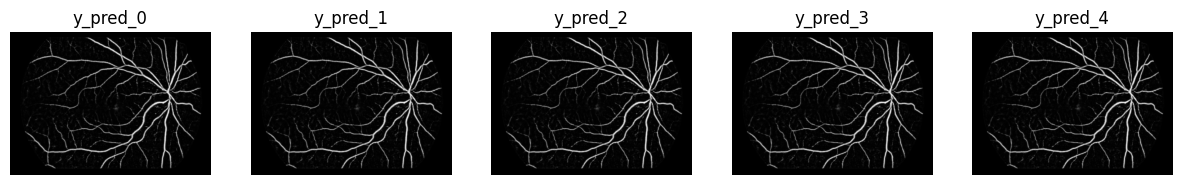

In [3]:
print ("Wyniki ekspertskie:\n")
num_images = exp_matrix.shape[0]

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    ax = axes[i]
    ax.imshow(exp_matrix[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'y_val_{i}')

plt.show()

print ("Wyniki nasze:\n")
num_images = our_matrix.shape[0]

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    ax = axes[i]
    ax.imshow(our_matrix[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'y_pred_{i}')

plt.show()

## Odczytanie maski

Resized mask size: (448, 320)
Size of images in matrices: (320, 448)


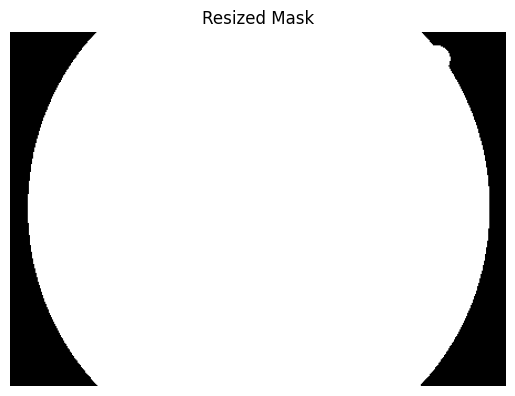

In [4]:
mask_path = "mask/01_dr_mask.tif"

# Load and resize the mask
mask_image = Image.open(mask_path).convert('L')
image_size = exp_matrix[0].shape
resized_mask = mask_image.resize((image_size[1], image_size[0]), Image.NEAREST)
mask_array = np.array(resized_mask)

print("Resized mask size:", resized_mask.size)
print("Size of images in matrices:", image_size)

plt.figure()
plt.imshow(resized_mask, cmap='gray')
plt.axis('off')
plt.title('Resized Mask')
plt.show()

## Macierz pomyłek


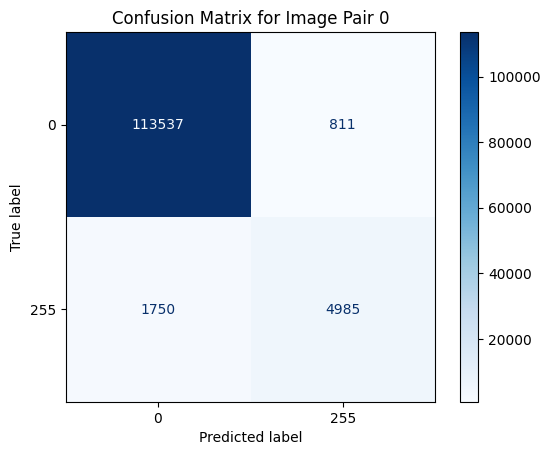

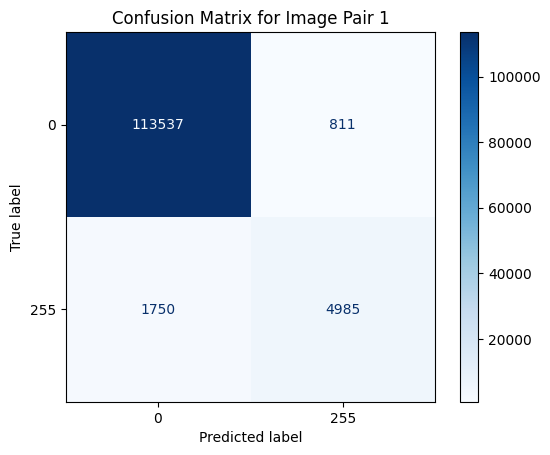

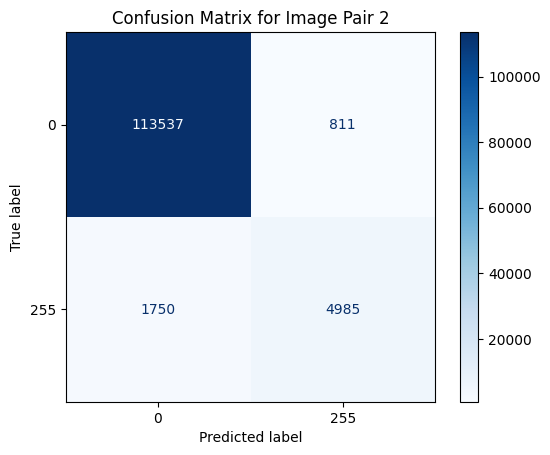

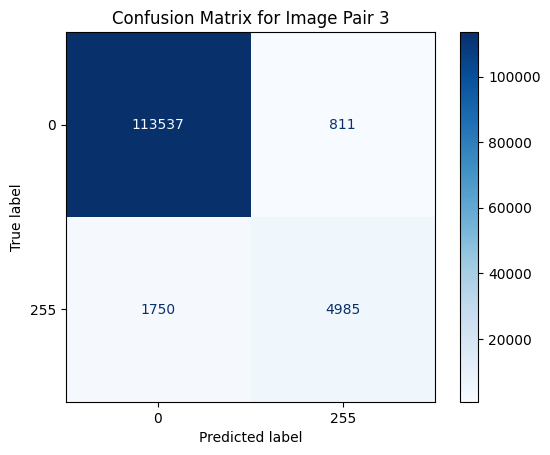

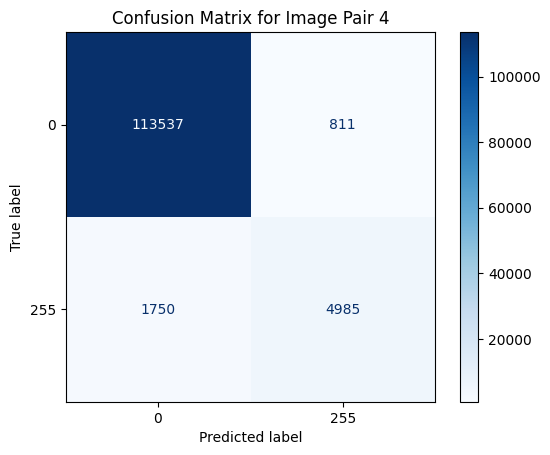

In [9]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


exp_matrix = np.where(exp_matrix > 127, 255, 0)
our_matrix = np.where(our_matrix > 127, 255, 0)


for i in range(num_images):
    exp_flat = exp_matrix[i][mask_array == 255].flatten()
    our_flat = our_matrix[i][mask_array == 255].flatten()
    
 #   print(f"Unique values in exp_flat for image pair {i}: {np.unique(exp_flat)}")
 #   print(f"Unique values in our_flat for image pair {i}: {np.unique(our_flat)}")
 #   print(f"Counts in exp_flat for image pair {i}: {np.bincount(exp_flat // 255)}")
 #   print(f"Counts in our_flat for image pair {i}: {np.bincount(our_flat // 255)}")

    cm = confusion_matrix(exp_flat, our_flat, labels=[0, 255], display_labels=[0, 255])

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 255])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for Image Pair {i}')
    plt.show()

Matrix of mistakes:



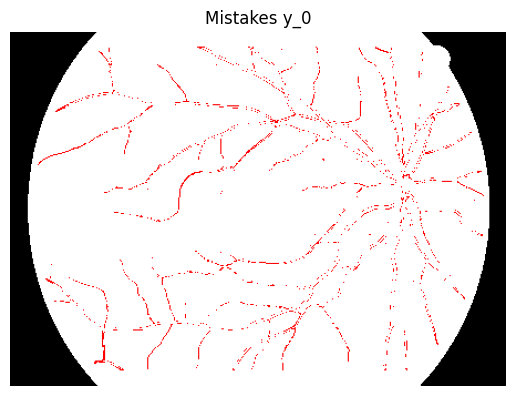

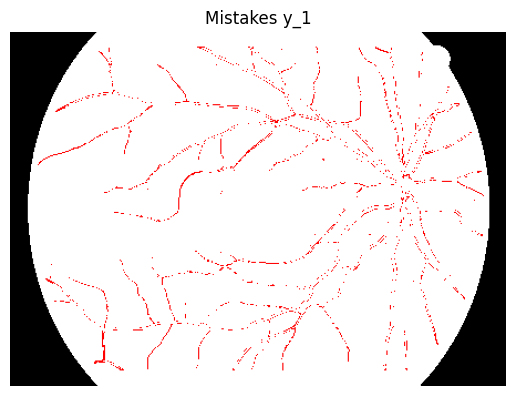

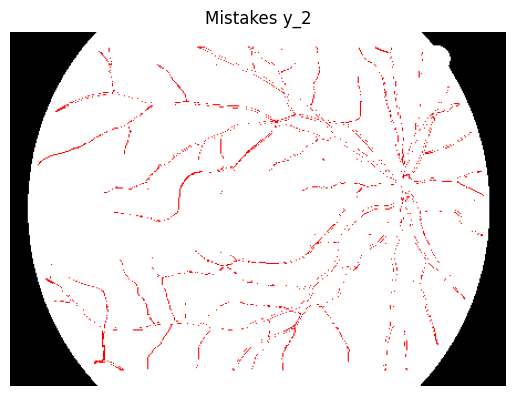

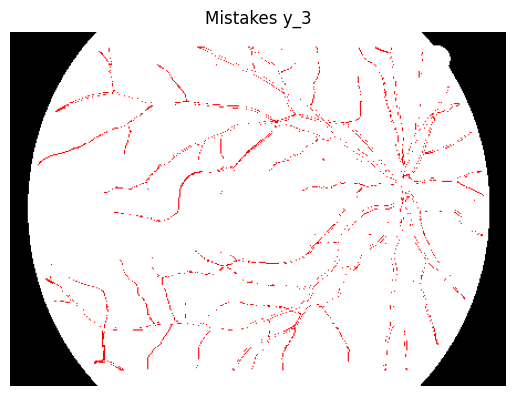

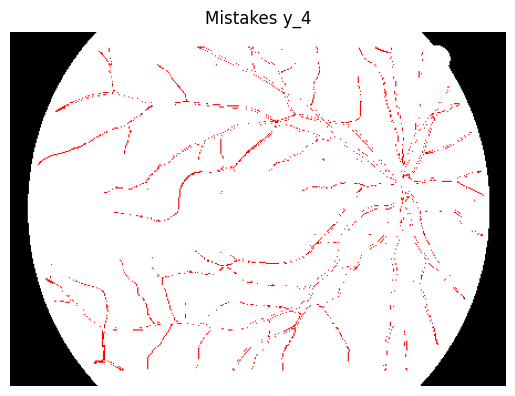

In [6]:
mistakes_matrix = np.zeros_like(exp_matrix)

# Calculate the mistakes
for i in range(exp_matrix.shape[0]):
    # Compare the predicted and actual images, considering only the white pixels in the mask
    mistakes_matrix[i] = np.where(mask_array == 255, exp_matrix[i] != our_matrix[i], 0)

# Display the mistakes with a colormap that highlights the mistakes in red
print("Matrix of mistakes:\n")
for i in range(num_images):
    # Create an RGB image for better visualization
    display_image = np.zeros((*mistakes_matrix[i].shape, 3), dtype=np.uint8)
    
    # Set the background based on the mask
    display_image[mask_array == 0] = [0, 0, 0]  # Black where mask is black
    display_image[mask_array == 255] =  [255, 255, 255]   # White where mask is white
    
    # Highlight mistakes in red
    display_image[mistakes_matrix[i] == 1] = [255, 0, 0]# Red where mistakes are
    
    plt.figure()
    plt.imshow(display_image)
    plt.axis('off')
    plt.title(f'Mistakes y_{i}')
    plt.show()